In [13]:
import os
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [ ]:

def handle_complex_data(x, valid_indices):
    real_parts = []
    imag_parts = []
    for i in valid_indices:
        real_parts.append(x[i * 2])
        imag_parts.append(x[i * 2 - 1])
    return np.array(real_parts) + 1j * np.array(imag_parts)


# 初始化全局字典
# 初始化字典
global_processed_data = {
    'action': [],
    'action_id': [],
    'complex_data': [],
}
# 根目录
root_folder = '/newhome/sensing/Falldataset_20240225'
csi_vaid_subcarrier_index = range(0, 52)


# # 遍历ID
# volunteer_id = 0
# for volunteer in os.listdir(root_folder):
#     id_path = os.path.join(root_folder, volunteer)
    
    # 遍历动作
action_id = 0
for action in os.listdir(root_folder):
    action_path = os.path.join(root_folder, action)
    # 检查是否为目录
    if os.path.isdir(action_path):
    # 遍历CSV文件
        for csv_file in os.listdir(action_path):
            if csv_file.endswith(".csv"):  # 检查文件是否是CSV

                csv_path = os.path.join(action_path, csv_file)
                
                # 读取CSV
                # print(csv_path)
                df = pd.read_csv(csv_path)
                df['data'] = df['data'].apply(lambda x: eval(x))
                # 处理数据
                complex_data = np.array(df['data'].apply(lambda x: handle_complex_data(x, csi_vaid_subcarrier_index)).tolist())

                # 添加到全局字典
                # global_processed_data['volunteer'].append(volunteer)
                # global_processed_data['volunteer_id'].append(volunteer_id)
                global_processed_data['action'].append(action)
                global_processed_data['action_id'].append(action_id)
                global_processed_data['complex_data'].append(complex_data)

        action_id += 1
    # volunteer_id += 1
# 保存全局字典为一个pickle文件
output_file = '/newhome/sensing/Falldataset_20240225/Fall_dataset.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(global_processed_data, f)

In [15]:
from scipy.interpolate import interp1d
import numpy as np
# 对每个复数数据数组进行插值
for i, data in enumerate(dataset['complex_data']):
    # 原始的第一维度大小
    original_size = data.shape[0]
    
    # 创建原始和新的插值点
    original_points = np.linspace(0, original_size - 1, original_size)
    new_points = np.linspace(0, original_size - 1, 100)
    
    # 初始化插值后的数组
    interpolated_data = np.zeros((100, 52), dtype=complex)
        # 对每个子载波进行插值
    for subcarrier in range(52):
        # 分别对实部和虚部进行插值
        real_interpolator = interp1d(original_points, data[:, subcarrier].real, kind='linear')
        imag_interpolator = interp1d(original_points, data[:, subcarrier].imag, kind='linear')
        
        # 应用插值并重组为复数
        interpolated_data[:, subcarrier] = real_interpolator(new_points) + 1j * imag_interpolator(new_points)
    
    # 更新插值后的数据
    dataset['complex_data'][i] = interpolated_data

In [29]:

# 读取数据集
with open('F:\SRIBD\ESP32-Realtime-System\Falldataset_20240225\model_20240228_110633.pth', 'rb') as f:
    dataset = pickle.load(f)

print(dataset.keys())

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [28]:
len(dataset['data'])

900

In [8]:
data= np.abs(dataset['data'])

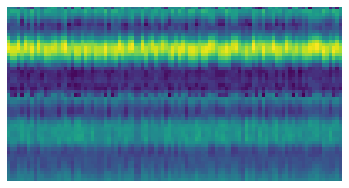

In [17]:
index =200

plt.imshow(data[index, :, :].T, cmap='viridis', interpolation='nearest')
plt.axis('off')

plt.savefig('test.png', bbox_inches='tight')

In [30]:
data = {
    'action': [],
    'action_id': [],
    'complex_data': [],
}
# 可修改的参数
# Reduce displayed waveforms to avoid display freezes
import json


CSI_VAID_SUBCARRIER_INTERVAL = 1 # interval越大，有效载波数越少

# 默认参数
# Remove invalid subcarriers
# secondary channel : below, HT, 40 MHz, non STBC, v, HT-LFT: 0~63, -64~-1, 384
csi_vaid_subcarrier_index = []
csi_vaid_subcarrier_color = []
color_step = 255 // (28 // CSI_VAID_SUBCARRIER_INTERVAL + 1)

# LLTF: 52
csi_vaid_subcarrier_index += [i for i in range(6, 32, CSI_VAID_SUBCARRIER_INTERVAL)]     # 26  red
csi_vaid_subcarrier_color += [(i * color_step, 0, 0) for i in range(1,  26 // CSI_VAID_SUBCARRIER_INTERVAL + 2)]
csi_vaid_subcarrier_index += [i for i in range(33, 59, CSI_VAID_SUBCARRIER_INTERVAL)]    # 26  green
csi_vaid_subcarrier_color += [(0, i * color_step, 0) for i in range(1,  26 // CSI_VAID_SUBCARRIER_INTERVAL + 2)]
CSI_DATA_LLFT_COLUMNS = len(csi_vaid_subcarrier_index)


CSI_DATA_COLUMNS = len(csi_vaid_subcarrier_index)

DATA_COLUMNS_NAMES = ["type", "id", "mac", "rssi", "rate", "sig_mode", "mcs", "bandwidth", "smoothing", "not_sounding", "aggregation", "stbc", "fec_coding",
                      "sgi", "noise_floor", "ampdu_cnt", "channel", "secondary_channel", "local_timestamp", "ant", "sig_len", "rx_state", "len", "first_word", "data"]

# Reduce displayed waveforms to avoid display freezes
CSI_VAID_SUBCARRIER_INTERVAL = 1

# Remove invalid subcarriers
# secondary channel : below, HT, 40 MHz, non STBC, v, HT-LFT: 0~63, -64~-1, 384
csi_vaid_subcarrier_index = []
csi_vaid_subcarrier_color = []
color_step = 255 // (28 // CSI_VAID_SUBCARRIER_INTERVAL + 1)

# LLTF: 52
csi_vaid_subcarrier_index += [i for i in range(6, 32, CSI_VAID_SUBCARRIER_INTERVAL)]     # 26  red
csi_vaid_subcarrier_color += [(i * color_step, 0, 0) for i in range(1,  26 // CSI_VAID_SUBCARRIER_INTERVAL + 2)]
csi_vaid_subcarrier_index += [i for i in range(33, 59, CSI_VAID_SUBCARRIER_INTERVAL)]    # 26  green
csi_vaid_subcarrier_color += [(0, i * color_step, 0) for i in range(1,  26 // CSI_VAID_SUBCARRIER_INTERVAL + 2)]
CSI_DATA_LLFT_COLUMNS = len(csi_vaid_subcarrier_index)


In [8]:
import pandas as pd
import numpy as np
import json
import pickle

def process_csv_to_csi_array(file_path, csi_vaid_subcarrier_index):
    df = pd.read_csv(file_path)
    csi_data_array = np.zeros([len(df), len(csi_vaid_subcarrier_index)], dtype=np.complex64)
    
    for index, row in df.iterrows():
        csi_string = row['data']
        try:
            csi_raw_data = json.loads(csi_string)
        except json.JSONDecodeError:
            continue
        
        if len(csi_raw_data) not in [128, 256, 384]:
            continue
        
        for i in range(len(csi_vaid_subcarrier_index)):
            csi_data_array[index, i] = complex(csi_raw_data[csi_vaid_subcarrier_index[i] * 2],
                                               csi_raw_data[csi_vaid_subcarrier_index[i] * 2 - 1])
    
    # 重塑并忽略超出部分
    num_complete_batches = csi_data_array.shape[0] // 100
    reshaped_data = csi_data_array[:num_complete_batches * 100].reshape(-1, 100, len(csi_vaid_subcarrier_index))
    reshaped_data = reshaped_data[:, np.newaxis, :, :]
    
    return reshaped_data

# 初始化数据和标签容器
data_list = []
action_ids = []

# 处理每个文件
for action_id, file_name in enumerate(['./dataset/fall2.csv', './dataset/sit2.csv', './dataset/walk2.csv']):
    file_path = f'/newhome/sensing/Falldataset_20240225/{file_name}'
    reshaped_data = process_csv_to_csi_array(file_path, csi_vaid_subcarrier_index)
    data_list.append(reshaped_data)
    action_ids.extend([action_id] * len(reshaped_data))

# 合并数据和标签
all_data = np.concatenate(data_list, axis=0)
all_action_ids = np.array(action_ids)

# 保存为pickle文件
with open('/newhome/sensing/Falldataset_20240225/csi_data_with_labels2.pkl', 'wb') as f:
    pickle.dump({'data': all_data, 'action_ids': all_action_ids}, f)

In [40]:
import pandas as pd
import numpy as np
import json
import pickle

def process_csv_to_csi_array(file_path, csi_vaid_subcarrier_index):
    df = pd.read_csv(file_path)
    csi_data_array = np.zeros([len(df), len(csi_vaid_subcarrier_index)], dtype=np.complex64)
    
    for index, row in df.iterrows():
        csi_string = row['data']
        try:
            csi_raw_data = json.loads(csi_string)
        except json.JSONDecodeError:
            continue
        
        if len(csi_raw_data) not in [128, 256, 384]:
            continue
        
        for i in range(len(csi_vaid_subcarrier_index)):
            csi_data_array[index, i] = complex(csi_raw_data[csi_vaid_subcarrier_index[i] * 2],
                                               csi_raw_data[csi_vaid_subcarrier_index[i] * 2 - 1])
    
    # 重塑并忽略超出部分
    num_complete_batches = csi_data_array.shape[0] // 100
    reshaped_data = csi_data_array[:num_complete_batches * 100].reshape(-1, 100, len(csi_vaid_subcarrier_index))
    reshaped_data = reshaped_data[:, np.newaxis, :, :]
    
    return reshaped_data

# 初始化数据和标签容器
data_list = []
action_ids = []

# 处理每个文件
# for file_name in enumerate(['./dataset/walk2.csv']):
file_path = 'F:\SRIBD\ESP32-Realtime-System\Falldataset_20240225\walk.csv'
reshaped_data = process_csv_to_csi_array(file_path, csi_vaid_subcarrier_index)
data_list.append(reshaped_data)
action_ids.extend([2] * len(reshaped_data))

# 合并数据和标签
all_data = np.concatenate(data_list, axis=0)
all_action_ids = np.array(action_ids)

# 保存为pickle文件
with open('F:\SRIBD\ESP32-Realtime-System\Falldataset_20240225\walk.pkl', 'wb') as f:
    pickle.dump({'data': all_data, 'action_ids': all_action_ids}, f)

In [22]:
# 保存全局字典为一个pickle文件
output_file = '/newhome/sensing/Falldataset_20240225/Fall_dataset_interp1d.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(dataset, f)

In [12]:
count=0
for i in range(len(dataset['complex_data'])):

    if dataset['complex_data'][i].shape[0]<80:
        count +=1
print(count)

123


In [32]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# 假设 complex_data_array 是形状为 (N, 100, 52, 2) 的NumPy数组
# actions_ids 是形状为 (N,) 的NumPy数组，包含每个样本的标签

# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(np.abs(dataset['complex_data'])[:,np.newaxis,:,:], dataset['action_id'], test_size=0.2, random_state=42)

# 转换为PyTorch张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 创建数据加载器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [36]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 输入通道为2，表示实部和虚部
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 25 * 13, 512)  # 根据池化层的输出调整
        self.fc2 = nn.Linear(512, len(set(global_processed_data['action_id'])))  # 输出层大小为类别数

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 25 * 13)  # 根据池化层的输出调整
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

import torch.optim as optim

# 实例化模型、定义损失函数和优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    
# 测试模型
# 这里添加测试模型的代码
